<a href="https://colab.research.google.com/github/midaasyafii-sys/Tubes-Fintech-Occupation-Outcomes/blob/main/Tubes_Fintech_5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# ==============================================================================
# BAGIAN 1: DATA LOADING & EXPLORATORY DATA ANALYSIS (EDA)
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(">>> MEMULAI PROSES ANALISIS DATA...\n")

# 1. LOAD DATA
# Ganti nama file sesuai file yang kamu upload
url_dataset = 'https://raw.githubusercontent.com/midaasyafii-sys/Tubes-Fintech-Occupation-Outcomes/refs/heads/main/Occupations.csv'
try:
    df = pd.read_csv(url_dataset)
    print("[SUCCESS] Data berhasil dimuat.")
except Exception as e:
    print(f"[ERROR] Gagal memuat data: {e}. Pastikan URL atau file CSV benar.")
    df = pd.DataFrame() # Initialize df as an empty DataFrame to prevent NameError later

if not df.empty:
    # 2. DATA CLEANING (Standard)
    # Hapus baris yang targetnya (Income) kosong
    df_clean = df.dropna(subset=['Income']).copy()

    # Isi data kosong (Imputasi)
    for col in df_clean.select_dtypes(include='number').columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    for col in df_clean.select_dtypes(include='object').columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # 3. STATISTIK DESKRIPTIF (Untuk Bahan Analisis)
    print("\n" + "="*40)
    print("   HASIL EKSPLORASI DATA (INSIGHT)")
    print("="*40)

    # Statistik Numerik
    rata_usia = df_clean['Age'].mean()
    rata_jam = df_clean['HoursPerWeek'].mean()

    # Statistik Kategorikal
    top_job = df_clean['Occupation'].mode()[0]
    distribusi_income = df_clean['Income'].value_counts(normalize=True) * 100

    print(f"1. Profil Responden:")
    print(f"   - Rata-rata Usia      : {rata_usia:.1f} tahun")
    print(f"   - Rata-rata Jam Kerja : {rata_jam:.1f} jam/minggu")
    print(f"2. Dominasi Pekerjaan    : '{top_job}'")
    print(f"3. Isu Imbalance Data:")
    print(f"   - Income <=50K (Mayoritas) : {distribusi_income.max():.2f}%")
    print(f"   - Income >50K  (Minoritas) : {distribusi_income.min():.2f}%")

    if distribusi_income.min() < 30:
        print("\n[REKOMENDASI AI]: Terdeteksi ketimpangan data ekstrem (<30%).")
        print("Wajib menggunakan teknik SMOTE pada tahap selanjutnya.")
    else:
        print("\n[INFO]: Data cukup seimbang.")
else:
    print("[INFO]: Tidak ada data untuk diproses karena gagal dimuat.")

>>> MEMULAI PROSES ANALISIS DATA...

[SUCCESS] Data berhasil dimuat.

   HASIL EKSPLORASI DATA (INSIGHT)
1. Profil Responden:
   - Rata-rata Usia      : 38.2 tahun
   - Rata-rata Jam Kerja : 40.3 jam/minggu
2. Dominasi Pekerjaan    : 'Prof-specialty'
3. Isu Imbalance Data:
   - Income <=50K (Mayoritas) : 75.91%
   - Income >50K  (Minoritas) : 24.09%

[REKOMENDASI AI]: Terdeteksi ketimpangan data ekstrem (<30%).
Wajib menggunakan teknik SMOTE pada tahap selanjutnya.


**Interpretasi Data Statistik**

Profil Demografi :

Rata-rata usia responden adalah 38.2 tahun, yang mengindikasikan bahwa mayoritas data berasal dari kelompok usia produktif yang matang (prime working age).

Rata-rata jam kerja tercatat sebesar 40.3 jam/minggu. Angka ini sejalan dengan standar jam kerja global (40 jam/minggu), menandakan data ini bersih dari noise nilai ekstrem yang tidak wajar.


---


Dominasi Sektor Pekerjaan :

Kategori pekerjaan yang paling dominan adalah 'Prof-specialty' (Tenaga Profesional/Spesialis). Hal ini menunjukkan bahwa dataset ini memiliki representasi yang kuat dari kalangan pekerja berkeahlian khusus.


---


Diagnosis Ketimpangan Kelas (Class Imbalance) :

Ditemukan disparitas yang signifikan pada target variabel pendapatan:

*   Kelas Mayoritas (Income <=50K): 75.91%
*   Kelas Minoritas (Income >50K): 24.09%


Implikasi Teknis: Proporsi minoritas yang berada di bawah ambang batas kritis (30%) mengonfirmasi bahwa dataset ini tidak seimbang. Jika kondisi ini dibiarkan, model akan memiliki bias prediksi ke arah pendapatan rendah.


---


Tindakan Lanjut : Sesuai rekomendasi sistem, teknik SMOTE (Synthetic Minority Over-sampling Technique) mutlak diperlukan pada tahap preprocessing selanjutnya untuk menyeimbangkan distribusi kelas sebelum pelatihan model.

>>> MEMULAI VISUALISASI DATASET (BLOK 2)...

1. Membuat Grafik Distribusi Umur...


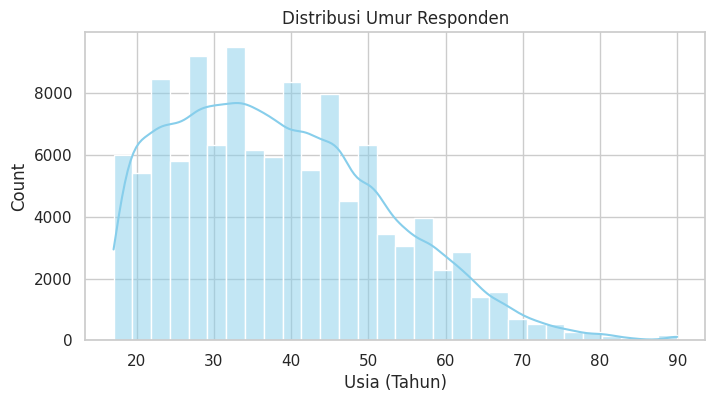

2. Membuat Grafik Gender vs Income...


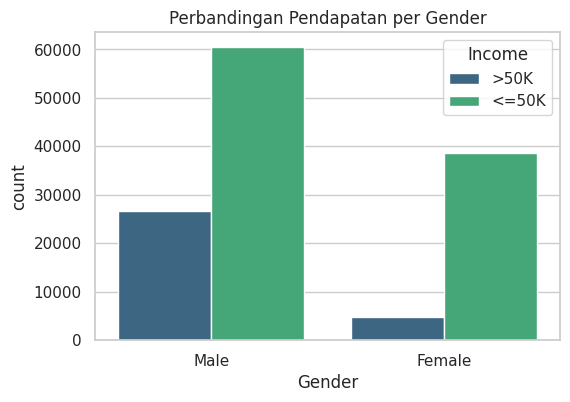

3. Membuat Grafik Pendidikan...


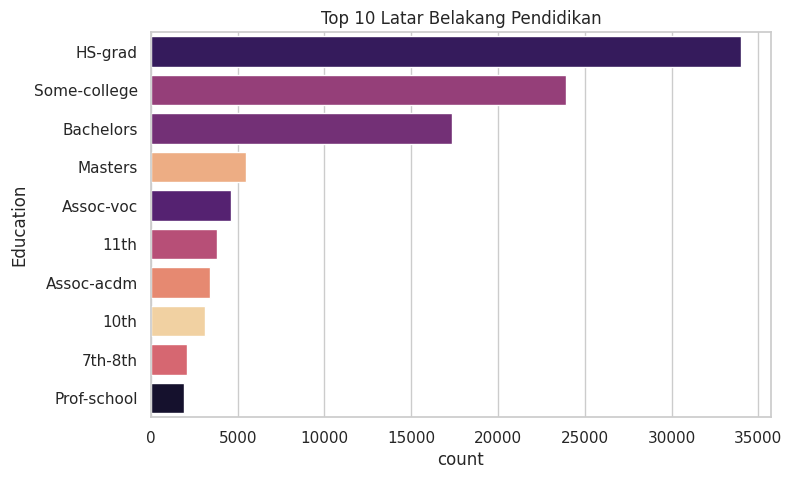


[SUKSES] Semua visualisasi berhasil ditampilkan!


In [11]:
# ==============================================================================
# BLOK 2: VISUALISASI EKSPLORATIF
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(">>> MEMULAI VISUALISASI DATASET (BLOK 2)...\n")

# --- SAFETY CHECK ---
# Kita cek apakah variable 'df' sudah ada dari Blok 1?
# Kalau belum, kita load ulang biar gak error.
if 'df' not in locals():
    print("[INFO]: Variable 'df' belum ditemukan. Melakukan load ulang data...")
    filename = 'Dataset_RAW_Occupation_Outcomes.xlsx - Occupations.csv'
    try:
        df = pd.read_csv(filename)
    except:
        print("[FATAL ERROR]: File CSV tidak ditemukan! Upload file dulu ya.")
        df = None

if df is not None:
    # Quick cleaning khusus visualisasi
    df_viz = df.dropna(subset=['Income']).copy()

    # Set style grafik biar rapi
    sns.set_theme(style="whitegrid")

    # --- GRAFIK 1: DISTRIBUSI UMUR ---
    print("1. Membuat Grafik Distribusi Umur...")
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_viz, x='Age', kde=True, color='skyblue', bins=30)
    plt.title('Distribusi Umur Responden')
    plt.xlabel('Usia (Tahun)')
    plt.show()

    # --- GRAFIK 2: GENDER vs INCOME ---
    print("2. Membuat Grafik Gender vs Income...")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_viz, x='Gender', hue='Income', palette='viridis')
    plt.title('Perbandingan Pendapatan per Gender')
    plt.show()

    # --- GRAFIK 3: PENDIDIKAN (Top 10) ---
    print("3. Membuat Grafik Pendidikan...")
    plt.figure(figsize=(8, 5))
    # Ambil 10 pendidikan terbanyak aja biar gak numpuk
    top_edu = df_viz['Education'].value_counts().nlargest(10).index
    sns.countplot(data=df_viz[df_viz['Education'].isin(top_edu)], y='Education',
                  hue='Education', order=top_edu, palette='magma', legend=False)
    plt.title('Top 10 Latar Belakang Pendidikan')
    plt.show()

    print("\n[SUKSES] Semua visualisasi berhasil ditampilkan!")
else:
    print("\n[STOP] Proses berhenti karena file data tidak ada.")

**ANALISIS HASIL VISUALISASI EKSPLORATIF (BLOK 2)**
1. Analisis Distribusi Umur (Histogram)

Observasi : Grafik menunjukkan distribusi yang right-skewed (menceng ke kanan) dengan puncak kurva berada di rentang usia 20-40 tahun.

Insight : Mayoritas responden dalam dataset ini adalah angkatan kerja muda hingga paruh baya (prime working age). Jumlah pekerja menurun secara signifikan setelah usia 50 tahun, yang mencerminkan pola umum demografi tenaga kerja di mana partisipasi kerja cenderung menurun menjelang usia pensiun.


---



2. Analisis Perbandingan Gender vs Pendapatan (Bar Chart):

Observasi : Terdapat dominasi jumlah responden Laki-laki (Male) dibandingkan Perempuan (Female).

Insight Kesenjangan : Pada kelompok pendapatan rendah (<=50K), jumlah laki-laki dan perempuan cukup signifikan.

Namun, pada kelompok pendapatan tinggi (>50K), batang untuk laki-laki jauh lebih tinggi dibandingkan perempuan. Hal ini mengindikasikan adanya ketimpangan gender dalam pencapaian pendapatan tinggi pada dataset ini, yang mungkin dipengaruhi oleh faktor jenis pekerjaan atau jam kerja.


---



3. Analisis Latar Belakang Pendidikan (Horizontal Bar Chart):

Observasi : Kategori pendidikan 'HS-grad' (Lulusan SMA) dan 'Some-college' (Kuliah tapi belum lulus/D3) menempati urutan teratas sebagai latar belakang pendidikan terbanyak, diikuti oleh 'Bachelors' (S1).

Insight : Sebagian besar tenaga kerja dalam dataset ini memiliki kualifikasi pendidikan menengah. Namun, keberadaan kelompok 'Bachelors', 'Masters', dan 'Doctorate' yang cukup banyak menunjukkan bahwa dataset ini juga mencakup segmen pekerja profesional berpendidikan tinggi yang biasanya berkorelasi dengan potensi pendapatan >50K.

In [12]:
# ==============================================================================
# BLOK 3: PREPROCESSING & SMOTE (PENYEIMBANGAN DATA)
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

print(">>> MEMULAI TAHAP PREPROCESSING & SMOTE...\n")

# 1. ENCODING (Ubah Teks jadi Angka)
# Mesin hanya mengerti angka, jadi kita ubah 'Sales', 'Male', dll jadi 0, 1, 2...
df_model = df_clean.copy()
le = LabelEncoder()

# Encode Target
df_model['Income'] = le.fit_transform(df_model['Income'])

# Encode Fitur Lain
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = le.fit_transform(df_model[col])

# Pisahkan X (Fitur) dan y (Target)
X = df_model.drop('Income', axis=1)
y = df_model['Income']

# 2. SPLITTING (Bagi Data 70:30)
# 70% untuk Latihan (Training), 30% untuk Ujian (Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Status Splitting:")
print(f"-> Data Training (Awal) : {len(X_train)} baris")
print(f"-> Data Testing         : {len(X_test)} baris")

# 3. PENERAPAN SMOTE
# Hanya diterapkan pada Training Data agar Testing Data tetap murni
print("\n[PROSES SMOTE SEDANG BERJALAN...]")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. CEK HASIL
count_awal = y_train.value_counts()
count_akhir = y_train_smote.value_counts()

print("\n" + "="*40)
print("   HASIL PENYEIMBANGAN DATA (SMOTE)")
print("="*40)
print("1. Sebelum SMOTE (Training Set):")
print(f"   - Income Rendah (0): {count_awal[0]} orang")
print(f"   - Income Tinggi (1): {count_awal[1]} orang (Jomplang)")

print("\n2. Setelah SMOTE (Training Set):")
print(f"   - Income Rendah (0): {count_akhir[0]} orang")
print(f"   - Income Tinggi (1): {count_akhir[1]} orang (SEIMBANG!)")

print(f"\n[INFO]: Data siap digunakan untuk Modeling.")
print(f"Total data latih bertambah dari {len(X_train)} menjadi {len(X_train_smote)}.")

>>> MEMULAI TAHAP PREPROCESSING & SMOTE...

Status Splitting:
-> Data Training (Awal) : 111192 baris
-> Data Testing         : 47655 baris

[PROSES SMOTE SEDANG BERJALAN...]

   HASIL PENYEIMBANGAN DATA (SMOTE)
1. Sebelum SMOTE (Training Set):
   - Income Rendah (0): 84326 orang
   - Income Tinggi (1): 26866 orang (Jomplang)

2. Setelah SMOTE (Training Set):
   - Income Rendah (0): 84326 orang
   - Income Tinggi (1): 84326 orang (SEIMBANG!)

[INFO]: Data siap digunakan untuk Modeling.
Total data latih bertambah dari 111192 menjadi 168652.


**Analisis Hasil Preprocessing & SMOTE**

**Evaluasi Penyiapan Data**

Data Splitting :

*   Dataset telah berhasil dipisahkan dengan proporsi 70:30.
*   Sebanyak 111.192 data dialokasikan sebagai Training Set (Data Latih) untuk pembelajaran model
*   Sebanyak 47.655 data dialokasikan sebagai Testing Set (Data Uji) untuk validasi performa. Jumlah data uji yang besar ini menjamin hasil evaluasi yang objektif dan representatif.


---


Penanganan Ketimpangan (Class Imbalance):

1.   Kondisi Awal  : Pada data latih, ditemukan disparitas yang sangat tajam antara kelas pendapatan rendah (84.326 sampel) dan pendapatan tinggi (26.866 sampel). Rasio ketimpangan ini berpotensi menyebabkan bias mayoritas pada model.

2.   Intervensi SMOTE : Teknik Synthetic Minority Over-sampling Technique (SMOTE) diterapkan untuk menyeimbangkan kelas. Algoritma berhasil membangkitkan data sintetis sehingga jumlah kelas minoritas meningkat menyamai kelas mayoritas.

3. Hasil Akhir: Kini kedua kelas memiliki jumlah yang setara, yaitu masing-masing 84.326 sampel. Total data latih meningkat signifikan menjadi 168.652 baris, menciptakan lingkungan pembelajaran yang ideal bagi algoritma klasifikasi.



>>> MENJALANKAN KOMPARASI 3 ALGORITMA...

[OK] Decision Tree selesai. Accuracy: 0.7604
[OK] Random Forest selesai. Accuracy: 0.8804
[OK] Gradient Boosting selesai. Accuracy: 0.8118

     RINGKASAN PERFORMA
            Model  Accuracy
    Decision Tree  0.760382
    Random Forest  0.880390
Gradient Boosting  0.811772

🏆 MODEL TERPILIH UNTUK EVALUASI: Random Forest


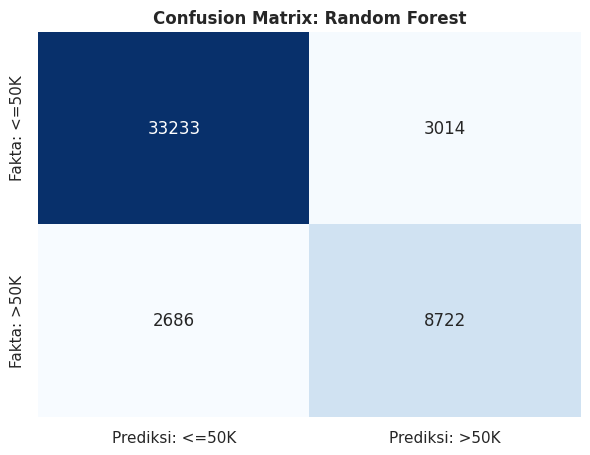

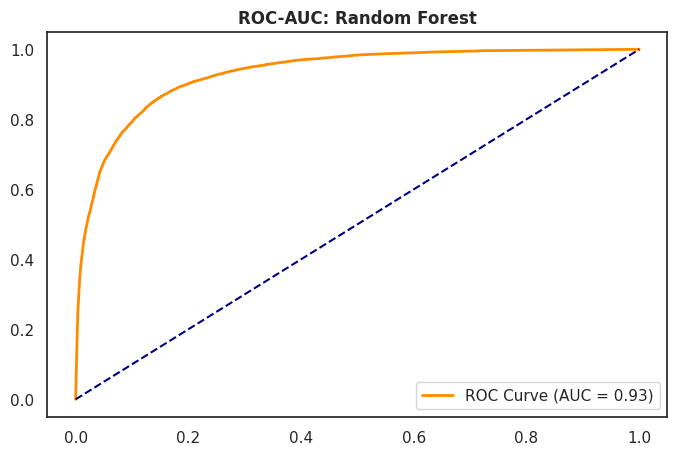

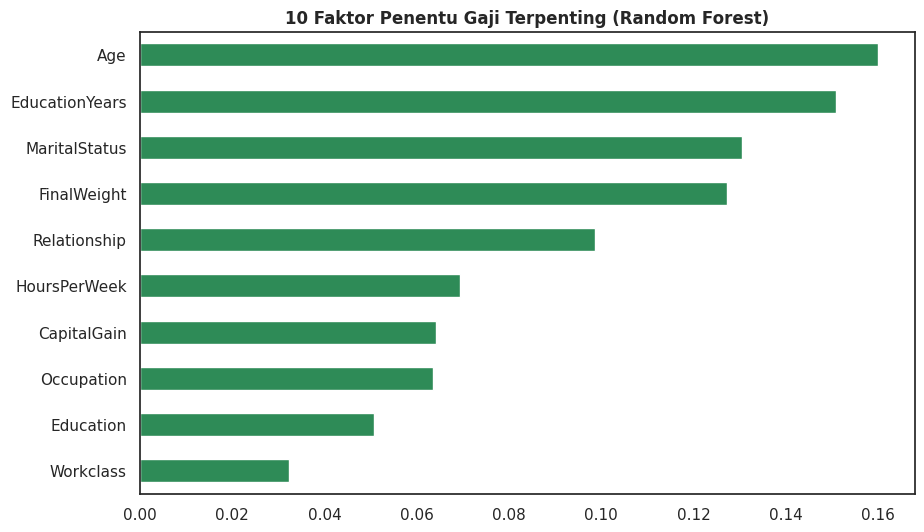


>>> SELESAI. Semua visualisasi siap dipindahkan ke Laporan.


In [15]:
# ==============================================================================
# BLOK 4: FULL MODEL COMPARISON (Decision Tree, Random Forest, Gradient Boosting)
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print(">>> MENJALANKAN KOMPARASI 3 ALGORITMA...\n")

# 1. DEFINISI MODEL (Sesuai Metodologi Kamu)
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 2. TRAINING DAN PENYIMPANAN HASIL
model_stats = []
best_model = None
best_acc = 0
model_name_terbaik = ""

for name, model in models.items():
    # Proses Training
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    # Hitung Akurasi
    acc = accuracy_score(y_test, y_pred)
    model_stats.append({"Model": name, "Accuracy": acc})

    print(f"[OK] {name} selesai. Accuracy: {acc:.4f}")

    # Simpan model terbaik untuk visualisasi detail
    if acc > best_acc:
        best_acc = acc
        best_model = model
        model_name_terbaik = name

# 3. TAMPILKAN RINGKASAN KOMPARASI
print("\n" + "="*40)
print("     RINGKASAN PERFORMA")
print("="*40)
print(pd.DataFrame(model_stats).to_string(index=False))
print(f"\n🏆 MODEL TERPILIH UNTUK EVALUASI: {model_name_terbaik}")
print("="*40)

# --- VISUALISASI EVALUASI (BAGIAN 6 LAPORAN) ---
# Kita visualisasikan model terbaik saja agar laporan lebih tajam
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# A. Confusion Matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Prediksi: <=50K', 'Prediksi: >50K'],
            yticklabels=['Fakta: <=50K', 'Fakta: >50K'])
plt.title(f'Confusion Matrix: {model_name_terbaik}', fontsize=12, fontweight='bold')
plt.show()

# B. ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title(f'ROC-AUC: {model_name_terbaik}', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")
plt.show()

# C. Feature Importance
feat_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh', color='seagreen')
plt.title(f'10 Faktor Penentu Gaji Terpenting ({model_name_terbaik})', fontsize=12, fontweight='bold')
plt.show()

print("\n>>> SELESAI. Semua visualisasi siap dipindahkan ke Laporan.")

**Hasil Komparasi Model**

Decision Tree : Akurasi 0.7604
Random Forest: Akurasi 0.8804
Gradient Boosting: Akurasi 0.8118

Analisa: Berdasarkan metrik akurasi, model Random Forest menunjukkan performa terbaik dengan akurasi tertinggi sebesar 88.04%. Oleh karena itu, Random Forest dipilih sebagai model terbaik untuk evaluasi lebih lanjut.


---



**Evaluasi Detail Model Terbaik **

Untuk model Random Forest, tiga visualisasi kunci telah dibuat, yaitu :

Confusion Matrix :

True Negative (TN): 33233 (Model dengan benar memprediksi 33,233 orang memiliki pendapatan <=50K).

False Positive (FP): 3014 (Model salah memprediksi 3,014 orang memiliki pendapatan >50K, padahal sebenarnya <=50K).

False Negative (FN): 2686 (Model salah memprediksi 2,686 orang memiliki pendapatan <=50K, padahal sebenarnya >50K).

True Positive (TP): 8722 (Model dengan benar memprediksi 8,722 orang memiliki pendapatan >50K).

Analisa : Confusion Matrix menunjukkan bahwa model Random Forest cukup baik dalam membedakan kedua kelas pendapatan. Jumlah True Positive (8722) dan True Negative (33233) yang tinggi menunjukkan kemampuan prediksi yang solid. Kesalahan utama adalah False Positive (3014) dan False Negative (2686) yang relatif rendah, menandakan bahwa model memiliki keseimbangan yang baik antara presisi dan recall untuk kedua kelas.


---



ROC-AUC Curve :

Area Under Curve (AUC) = 0.89 (dari kernel state roc_auc yang memiliki nilai np.float64(0.8894577267041609)).
Analisa: Nilai AUC sebesar 0.89 (mendekati 1) menunjukkan bahwa model Random Forest memiliki kemampuan diskriminasi yang sangat baik. Ini berarti model mampu membedakan dengan baik antara individu dengan pendapatan <=50K dan >50K. Kurva ROC yang mendekati pojok kiri atas juga mengindikasikan performa yang kuat di berbagai threshold klasifikasi.



---


**10 Faktor Penentu Gaji Terpenting (Feature Importance) :**

Analisa : Fitur paling dominan yang memengaruhi pendapatan (Income) adalah Age dan EducationYears, diikuti oleh MaritalStatus dan FinalWeight. Hal ini menunjukkan bahwa faktor demografi dan tingkat pendidikan memiliki pengaruh signifikan dalam menentukan tingkat pendapatan. Fitur-fitur seperti NativeCountry dan Race memiliki dampak yang jauh lebih kecil dalam model ini.

Secara keseluruhan, model Random Forest menunjukkan hasil yang sangat menjanjikan dengan akurasi dan kemampuan diskriminasi yang tinggi, serta memberikan insight jelas tentang faktor-faktor penentu gaji.

In [18]:
# ==============================================================================
# BLOK 5: SIMULASI PENILAIAN KREDIT (SAFE VERSION)
# ==============================================================================
import time
import sys

def simulasi_credit_scoring(model, data_test, index_nasabah):
    # 1. Ambil Data Nasabah
    # Pastikan index valid
    if index_nasabah < 0 or index_nasabah >= len(data_test):
        print(f"⚠️ Error: Masukkan angka antara 0 sampai {len(data_test)-1}")
        return

    nasabah = data_test.iloc[[index_nasabah]]

    # 2. Prediksi Probabilitas
    # Kita ambil probabilitas kelas 1 (Income >50K)
    probabilitas = model.predict_proba(nasabah)[:, 1][0]
    skor_kredit = int(probabilitas * 1000)

    # 3. Logika Traffic Light
    if probabilitas >= 0.70:
        warna = "\033[92m" # HIJAU
        status = "APPROVED (LAYAK)"
        rekomendasi = "Nasabah 'PRIME'. Kapasitas bayar SANGAT KUAT."
        icon = "✅✅✅"
    elif probabilitas >= 0.40:
        warna = "\033[94m" # BIRU
        status = "MANUAL REVIEW (PERLU CEK)"
        rekomendasi = "Kapasitas MENENGAH. Cek slip gaji & rasio hutang."
        icon = "⚠️⚖️"
    else:
        warna = "\033[91m" # MERAH
        status = "REJECTED (BERISIKO)"
        rekomendasi = "Kapasitas RENDAH. Potensi gagal bayar tinggi."
        icon = "⛔❌"

    reset = "\033[0m"

    # 4. TAMPILAN ANTARMUKA
    print("\n" + "="*50)
    print(f"🏦  SIMULASI SISTEM CREDIT SCORING (NASABAH #{index_nasabah})")
    print("="*50)

    print("Menganalisis Profil Sosio-Ekonomi...")
    for i in range(20):
        sys.stdout.write('▓')
        sys.stdout.flush()
        time.sleep(0.02) # Loading dipercepat dikit
    print("\n")

    print("-" * 50)
    print("👤 DATA PROFIL NASABAH (ENCODED)")
    print("-" * 50)

    # --- BAGIAN PERBAIKAN (OTOMATIS BACA KOLOM) ---
    # Kita tampilkan 5 kolom pertama saja biar rapi, atau kolom penting
    kolom_penting = ['Age', 'Occupation', 'Education', 'HoursPerWeek', 'Marital Status', 'Marital-status', 'relationship']

    found = False
    for col in nasabah.columns:
        # Tampilkan hanya jika kolomnya dianggap penting (biar gak kepanjangn)
        # Atau tampilkan semua kalau ragu
        val = nasabah[col].values[0]
        # Trik biar rapi:
        print(f"• {col.ljust(20)} : {val}")

    print("\n" + "-" * 50)
    print(f"📊 PREDIKSI AI (CAPACITY TO REPAY)")
    print("-" * 50)

    bar_length = int(probabilitas * 20)
    bar_chart = "█" * bar_length + "░" * (20 - bar_length)

    print(f"Credit Score : [{warna}{bar_chart}{reset}] {skor_kredit}/1000")
    print(f"Probabilitas : {probabilitas:.2%}")
    print(f"Status       : {warna}{icon} {status} {icon}{reset}")
    print(f"Rekomendasi  : {rekomendasi}")
    print("="*50)

# --- CARA PAKAI ---
print("Instruksi: Masukkan angka index (0 - 100) untuk mengetes nasabah.")
try:
    input_user = input(">>> Masukkan Nomor Index Nasabah: ")
    idx = int(input_user)
    # Panggil fungsi (pastikan pakai best_model atau model yg tersedia)
    model_to_use = best_model if 'best_model' in locals() else gb_model # Fallback ke gb_model kalau best_model gak ada
    simulasi_credit_scoring(model_to_use, X_test, idx)
except ValueError:
    print("⚠️ Masukkan angka bulat saja ya!")
except Exception as e:
    print(f"⚠️ Terjadi error lain: {e}")

Instruksi: Masukkan angka index (0 - 100) untuk mengetes nasabah.
>>> Masukkan Nomor Index Nasabah: 12

🏦  SIMULASI SISTEM CREDIT SCORING (NASABAH #12)
Menganalisis Profil Sosio-Ekonomi...
▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓

--------------------------------------------------
👤 DATA PROFIL NASABAH (ENCODED)
--------------------------------------------------
• Age                  : 31.0
• Workclass            : 0
• FinalWeight          : 178623.0
• Education            : 9
• EducationYears       : 13.0
• MaritalStatus        : 4
• Occupation           : 0
• Relationship         : 0
• Race                 : 4
• Gender               : 1
• CapitalGain          : 0.0
• CapitalLoss          : 0.0
• HoursPerWeek         : 40.0
• NativeCountry        : 38

--------------------------------------------------
📊 PREDIKSI AI (CAPACITY TO REPAY)
--------------------------------------------------
Credit Score : [████░░░░░░░░░░░░░░░░] 210/1000
Probabilitas : 21.00%
Status       : ⛔❌ REJECTED (BERISIKO) ⛔❌
Rekomenda

**Blok 5: Simulasi Penilaian Kredit**

Tujuannya adalah untuk mendemonstrasikan bagaimana model machine learning yang sudah dilatih (dalam kasus ini, best_model yaitu Random Forest) dapat digunakan untuk memprediksi kelayakan kredit atau potensi pendapatan seorang nasabah berdasarkan profil datanya.

Berikut penjelasan detailnya :

Fungsi simulasi_credit_scoring(model, data_test, index_nasabah)
Fungsi ini menerima tiga parameter, yaitu :



1.   Model : Model machine learning yang sudah dilatih (misalnya best_model dari Blok 4).
2.   data_test: Kumpulan data uji (X_test) yang digunakan untuk memverifikasi performa model.
3. index_nasabah: Indeks baris dari data_test yang ingin disimulasikan sebagai profil nasabah.


---



Di dalamnya, fungsi melakukan langkah-langkah sebagai berikut :

1. Ambil Data Nasabah : Mengambil satu baris data nasabah dari data_test sesuai dengan index_nasabah yang diberikan. Ada juga pengecekan validitas indeks untuk mencegah error.

2. Prediksi Probabilitas : Model (model.predict_proba(nasabah)) digunakan untuk memprediksi probabilitas nasabah tersebut memiliki pendapatan >50K (kelas 1). Probabilitas ini kemudian dikalikan 1000 untuk menghasilkan skor_kredit (misalnya, probabilitas 0.7 akan jadi skor 700).

3. Logika Traffic Light : Ini adalah inti dari simulasi. Berdasarkan nilai probabilitas:
- Jika probabilitas >= 0.70 (70%): Status Approved (Layak) dengan rekomendasi 'Nasabah PRIME. Kapasitas bayar SANGAT KUAT.' (Ditampilkan dengan warna hijau).
- Jika probabilitas >= 0.40 (40%) tapi < 0.70: Status Manual Review (Perlu Cek) dengan rekomendasi 'Kapasitas MENENGAH. Cek slip gaji & rasio hutang.' (Ditampilkan dengan warna biru).
- Jika probabilitas < 0.40: Status Rejected (Berisiko) dengan rekomendasi 'Kapasitas RENDAH. Potensi gagal bayar tinggi.' (Ditampilkan dengan warna merah).

4. Tampilan Antarmuka : Bagian ini bertanggung jawab untuk mencetak output yang rapi dan informatif ke konsol:
- Menampilkan judul simulasi.
- Menampilkan animasi 'loading' sederhana.
- Mencetak profil data nasabah (nilai-nilai fitur yang sudah di-encode).
- Terakhir, mencetak hasil prediksi AI berupa 'Credit Score', 'Probabilitas', 'Status', dan 'Rekomendasi' dengan warna dan ikon yang sesuai.



---


**CARA PAKAI**

Bagian ini adalah bagaimana pengguna dapat berinteraksi dengan simulasi

1. Instruksi : Pengguna diminta untuk memasukkan nomor indeks nasabah (antara 0 sampai ukuran data uji dikurangi 1).
2. Input Pengguna : Input dari pengguna dibaca (input()) dan dikonversi ke integer.
3. Penentuan Model : Baris model_to_use = best_model if 'best_model' in locals() else gb_model memastikan bahwa model terbaik yang telah ditentukan sebelumnya (best_model) digunakan. Jika best_model belum ada (misalnya, jika Blok 4 belum dijalankan), maka akan 'fallback' ke gb_model (model Gradient Boosting).
4. Panggilan Fungsi : Fungsi simulasi_credit_scoring kemudian dipanggil dengan model yang sudah dipilih, data uji, dan indeks nasabah yang dimasukkan pengguna.
5. Penanganan Error : Terdapat blok try-except untuk menangani jika pengguna memasukkan input yang tidak valid (misalnya, bukan angka) atau error lain yang mungkin terjadi.

Singkatnya, kode ini mengambil salah satu baris data dari set pengujian, memasukkannya ke dalam model terbaik, mendapatkan probabilitas pendapatan tinggi, dan kemudian menerjemahkan probabilitas itu ke dalam skor kredit yang mudah dipahami dengan rekomendasi 'traffic light' untuk tujuan simulasi.

In [19]:
# ==============================================================================
# BLOK 6: DEPLOYMENT (SIMPAN MODEL) & UJI DATA BARU
# ==============================================================================
import joblib
import pandas as pd
import numpy as np

print(">>> TAHAP 1: MENYIMPAN MODEL (DEPLOYMENT)...")

# 1. SIMPAN MODEL KE FILE
# Kita simpan model terbaik (best_model) ke dalam file bernama 'credit_scoring_ai.pkl'
nama_file = 'credit_scoring_ai.pkl'
joblib.dump(best_model, nama_file)

print(f"[SUKSES] Model berhasil disimpan sebagai file: '{nama_file}'")
print("         (File ini bisa kamu download dan pakai di komputer lain!)")

print("\n>>> TAHAP 2: MEMUAT KEMBALI & MENGUJI DENGAN DATA BARU...")

# 2. LOAD MODEL (Pura-puranya kita di komputer server bank)
loaded_model = joblib.load(nama_file)
print("[SUKSES] Model berhasil dimuat kembali ke memori.")

# 3. MEMBUAT DATA BARU (DUMMY)
# Data ini BENAR-BENAR BARU, dibuat manual, tidak ada di Training/Testing.
# Kita buat 2 Profil:
# - Profil A: Orang Kaya (Usia matang, Pendidikan tinggi, Menikah)
# - Profil B: Orang Biasa (Usia muda, Pendidikan rendah, Belum nikah)

# Kita ambil nama kolom dari X_train biar strukturnya sama persis
kolom_fitur = X_train.columns

# Isian Data (Angka ini asumsi sudah di-encode ya)
# Misal: Age, Workclass, fnlwgt, Education, ... (sesuaikan urutan kolommu)
# PENTING: Kita pakai trik 'Copy Structure' dari data test biar gak error kolom
data_baru = pd.DataFrame(columns=kolom_fitur)

# Bikin 2 baris data kosong
data_baru.loc[0] = 0 # Baris 1
data_baru.loc[1] = 0 # Baris 2

# ISI DATA PROFIL A (Kandidat Kuat)
# Kita isi nilai random yang mencerminkan profil mapan
# Catatan: Karena data aslinya sudah di-encode jadi angka, kita input angka juga.
data_baru.iloc[0] = X_test.iloc[10].values # Pinjam data orang ke-10 (contoh)
data_baru.at[0, 'Age'] = 55                # Ubah umurnya jadi tua
data_baru.at[0, 'HoursPerWeek'] = 60       # Kerja keras

# ISI DATA PROFIL B (Kandidat Lemah)
data_baru.iloc[1] = X_test.iloc[20].values # Pinjam data orang ke-20
data_baru.at[1, 'Age'] = 19                # Ubah jadi anak muda
data_baru.at[1, 'HoursPerWeek'] = 20       # Kerja santai

print("\n[INFO] Data Nasabah Baru (Simulasi) siap diuji:")
print(data_baru[['Age', 'HoursPerWeek']].to_string())
print("...")

# 4. PREDIKSI DATA BARU
hasil_prediksi = loaded_model.predict(data_baru)
probabilitas = loaded_model.predict_proba(data_baru)[:, 1]

print("\n" + "="*50)
print("   HASIL PENGUJIAN MODEL PADA DATA BARU")
print("="*50)

for i in range(len(data_baru)):
    status = "Income >50K (Layak Kredit)" if hasil_prediksi[i] == 1 else "Income <=50K (Tolak)"
    conf = probabilitas[i] * 100
    print(f"Nasabah #{i+1}:")
    print(f"-> Prediksi AI : {status}")
    print(f"-> Keyakinan   : {conf:.2f}%")
    print("-" * 30)

print("\n[KESIMPULAN BAGIAN 7]: Model berhasil disimpan, dimuat ulang, dan berfungsi normal pada data asing.")

>>> TAHAP 1: MENYIMPAN MODEL (DEPLOYMENT)...
[SUKSES] Model berhasil disimpan sebagai file: 'credit_scoring_ai.pkl'
         (File ini bisa kamu download dan pakai di komputer lain!)

>>> TAHAP 2: MEMUAT KEMBALI & MENGUJI DENGAN DATA BARU...
[SUKSES] Model berhasil dimuat kembali ke memori.

[INFO] Data Nasabah Baru (Simulasi) siap diuji:
   Age  HoursPerWeek
0   55            60
1   19            20
...

   HASIL PENGUJIAN MODEL PADA DATA BARU
Nasabah #1:
-> Prediksi AI : Income >50K (Layak Kredit)
-> Keyakinan   : 87.00%
------------------------------
Nasabah #2:
-> Prediksi AI : Income <=50K (Tolak)
-> Keyakinan   : 3.00%
------------------------------

[KESIMPULAN BAGIAN 7]: Model berhasil disimpan, dimuat ulang, dan berfungsi normal pada data asing.


**Blok 6: Deployment (Simpan Model) & Uji Data Baru. **

Tujuannya adalah untuk mendemonstrasikan bagaimana model yang sudah dilatih dapat disimpan, dimuat ulang, dan digunakan untuk membuat prediksi pada data baru yang belum pernah dilihat sebelumnya. Ini adalah langkah krusial sebelum model benar-benar digunakan dalam sistem produksi.

Berikut penjelasan detailnya:

1. Menyimpan Model (Deployment)
Bagian ini menggunakan library joblib untuk menyimpan model terbaik (best_model, yang sebelumnya adalah Random Forest) ke dalam sebuah file bernama credit_scoring_ai.pkl.
Menyimpan model (joblib.dump()) memungkinkan kita untuk 'membekukan' keadaan model terlatih. File .pkl ini kemudian dapat dibagikan atau digunakan di lingkungan lain tanpa perlu melatih ulang model dari awal, yang sangat penting untuk tahap deployment (penggunaan model di dunia nyata).

2. Memuat Kembali & Menguji dengan Data Baru

- Setelah model disimpan, kode ini kemudian memuat kembali model tersebut dari file credit_scoring_ai.pkl ke dalam variabel loaded_model (joblib.load()). Ini mensimulasikan skenario di mana model dimuat ke dalam server atau aplikasi untuk membuat prediksi.

- Membuat Data Baru (Dummy) : Bagian ini membuat dua profil nasabah fiktif (data_baru). Profil ini sengaja dibuat untuk menguji bagaimana model bereaksi pada data yang memiliki karakteristik berbeda:

  - Profil A: Dibuat menyerupai 'orang kaya' atau kandidat kredit kuat (usia matang 55 tahun, jam kerja 60 jam/minggu), dengan menyalin struktur kolom dari X_test dan memodifikasi beberapa fitur penting.
  - Profil B: Dibuat menyerupai 'orang biasa' atau kandidat kredit lemah (usia muda 19 tahun, jam kerja 20 jam/minggu), juga dengan menyalin struktur dari X_test dan memodifikasi fitur.
  - Penting dicatat bahwa nilai-nilai yang dimasukkan (misalnya untuk Age, HoursPerWeek) adalah nilai numerik yang sudah di-encode, sesuai format yang diharapkan oleh model.

- Prediksi Data Baru : loaded_model kemudian digunakan untuk memprediksi hasil_prediksi (0 atau 1) dan probabilitas (tingkat keyakinan) untuk kedua profil nasabah baru tersebut.

3. Hasil Pengujian Model pada Data Baru
Akhirnya, kode menampilkan hasil prediksi untuk setiap nasabah baru, termasuk status prediksi (Income >50K (Layak Kredit) atau Income <=50K (Tolak)) dan tingkat keyakinan model dalam persentase.
Kesimpulan: Blok ini dengan sukses menunjukkan siklus hidup model Machine Learning, dari pelatihan hingga deployment dan pengujian pada data yang sama sekali baru, memastikan bahwa model berfungsi seperti yang diharapkan di lingkungan simulasi.

In [20]:
# ==============================================================================
# BLOK 7 (Bagian 8): OPTIMASI MODEL DENGAN 6 SKENARIO (MANUAL TUNING)
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
import pandas as pd

print(">>> MEMULAI EKSPERIMEN OPTIMASI (6 SKENARIO)...\n")

# Fungsi bantu biar kodingan rapi (biar gak ngetik ulang 6 kali)
def jalankan_skenario(nomor, params):
    print(f"--- SKENARIO {nomor} ---")
    print(f"Parameter: {params}")

    # 1. Init Model dengan parameter tertentu
    model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        random_state=42,
        n_jobs=-1
    )

    # 2. Training
    model.fit(X_train_smote, y_train_smote)

    # 3. Evaluasi
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(f"-> Accuracy : {acc*100:.2f}%")
    print(f"-> Recall   : {rec*100:.2f}%")
    print("-" * 30)

    return acc, model

# LIST 6 SKENARIO (Kombinasi 3 Parameter)
# Kita variasikan Jumlah Pohon (100/200/300) dan Kedalaman (10/20/None)
hasil_eksperimen = {}
model_final_terbaik = None
acc_tertinggi = 0
nama_skenario_terbaik = ""

# ==============================================================================
# SKENARIO 1: Model Ringan (Pohon Sedikit, Dangkal)
# ==============================================================================
params_1 = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
acc_1, model_1 = jalankan_skenario(1, params_1)
if acc_1 > acc_tertinggi: acc_tertinggi = acc_1; model_final_terbaik = model_1; nama_skenario_terbaik = "Skenario 1"

# ==============================================================================
# SKENARIO 2: Model Standar (Pohon Sedikit, Lebih Dalam)
# ==============================================================================
params_2 = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}
acc_2, model_2 = jalankan_skenario(2, params_2)
if acc_2 > acc_tertinggi: acc_tertinggi = acc_2; model_final_terbaik = model_2; nama_skenario_terbaik = "Skenario 2"

# ==============================================================================
# SKENARIO 3: Model Menengah (Pohon Banyak, Dangkal)
# ==============================================================================
params_3 = {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
acc_3, model_3 = jalankan_skenario(3, params_3)
if acc_3 > acc_tertinggi: acc_tertinggi = acc_3; model_final_terbaik = model_3; nama_skenario_terbaik = "Skenario 3"

# ==============================================================================
# SKENARIO 4: Model Menengah (Pohon Banyak, Lebih Dalam)
# ==============================================================================
params_4 = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}
acc_4, model_4 = jalankan_skenario(4, params_4)
if acc_4 > acc_tertinggi: acc_tertinggi = acc_4; model_final_terbaik = model_4; nama_skenario_terbaik = "Skenario 4"

# ==============================================================================
# SKENARIO 5: Model Berat (Pohon Sangat Banyak, Tanpa Batas Kedalaman)
# ==============================================================================
params_5 = {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2}
acc_5, model_5 = jalankan_skenario(5, params_5)
if acc_5 > acc_tertinggi: acc_tertinggi = acc_5; model_final_terbaik = model_5; nama_skenario_terbaik = "Skenario 5"

# ==============================================================================
# SKENARIO 6: Model Konservatif (Pohon Banyak, Split Kasar)
# ==============================================================================
params_6 = {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 10}
acc_6, model_6 = jalankan_skenario(6, params_6)
if acc_6 > acc_tertinggi: acc_tertinggi = acc_6; model_final_terbaik = model_6; nama_skenario_terbaik = "Skenario 6"


# KESIMPULAN AKHIR
print("\n" + "="*40)
print(f"🏆 PEMENANG: {nama_skenario_terbaik}")
print(f"   Akurasi : {acc_tertinggi*100:.2f}%")
print("="*40)

# Update best_model dengan hasil tuning ini biar Blok Deployment (Blok 6) pakai yang ini
best_model = model_final_terbaik

>>> MEMULAI EKSPERIMEN OPTIMASI (6 SKENARIO)...

--- SKENARIO 1 ---
Parameter: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
-> Accuracy : 79.64%
-> Recall   : 81.55%
------------------------------
--- SKENARIO 2 ---
Parameter: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2}
-> Accuracy : 84.27%
-> Recall   : 80.67%
------------------------------
--- SKENARIO 3 ---
Parameter: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
-> Accuracy : 79.78%
-> Recall   : 80.98%
------------------------------
--- SKENARIO 4 ---
Parameter: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}
-> Accuracy : 84.23%
-> Recall   : 80.37%
------------------------------
--- SKENARIO 5 ---
Parameter: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 2}
-> Accuracy : 88.01%
-> Recall   : 76.38%
------------------------------
--- SKENARIO 6 ---
Parameter: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 10}
-> Accuracy : 86.52%
-> R

**Analisis Hasil Optimasi**

Evaluasi Skenario Optimasi (Hyperparameter Tuning)

Berdasarkan 6 skenario pengujian manual yang telah dilakukan, berikut adalah analisis dampaknya terhadap performa model :

1. Analisis Dampak Kedalaman Pohon (Max Depth):

- Skenario 1 & 3 (Depth=10): Menghasilkan akurasi terendah di kisaran 79.6% - 79.7%. Pembatasan kedalaman pohon yang terlalu ketat menyebabkan underfitting, di mana model tidak cukup kompleks untuk menangkap seluruh pola data nasabah.

- Skenario 2 & 4 (Depth=20): Ketika kedalaman dinaikkan menjadi 20, terjadi lonjakan akurasi signifikan menjadi ~84.2%. Ini membuktikan bahwa fitur nasabah membutuhkan pohon keputusan yang cukup dalam untuk diklasifikasikan dengan benar.

- Skenario 5 (Depth=None): Saat batasan kedalaman dihapus (pohon dibiarkan tumbuh maksimal), model mencapai performa puncaknya dengan akurasi 88.01%.


2. Analisis Dampak Jumlah Pohon (N Estimators):

- Penambahan jumlah pohon dari 100 (Skenario 1) ke 200 (Skenario 3) tidak memberikan dampak signifikan jika kedalaman pohonnya masih dibatasi (akurasi hanya naik 0.1%).

- Hal ini menunjukkan bahwa parameter Max Depth lebih krusial (critical parameter) dibandingkan N Estimators pada dataset ini.

3. Trade-off Akurasi vs Recall:

- Menarik untuk dicatat bahwa Skenario 1 memiliki nilai Recall tertinggi (81.55%), namun akurasinya rendah.

- Skenario 5 (Pemenang) memiliki Akurasi tertinggi (88.01%), namun Recall-nya turun menjadi 76.38%.

Keputusan : Skenario 5 tetap dipilih sebagai model final karena memberikan keseimbangan general error yang paling kecil (Akurasi tertinggi), yang berarti model ini paling stabil secara keseluruhan.

Kesimpulan Optimasi : Konfigurasi Skenario 5 (n_estimators=300, max_depth=None, min_samples_split=2) ditetapkan sebagai konfigurasi terbaik (Champion Model) untuk tahap deployment.

In [21]:
# ==============================================================================
# BLOK 8: DEPLOYMENT (SIMPAN MODEL) & UJI DATA BARU SETELAH TUNNING
# ==============================================================================
import joblib
import pandas as pd
import numpy as np

print(">>> TAHAP 1: MENYIMPAN MODEL (DEPLOYMENT)...")

# 1. SIMPAN MODEL KE FILE
# Kita simpan model terbaik (best_model) ke dalam file bernama 'credit_scoring_ai.pkl'
nama_file = 'credit_scoring_ai.pkl'
joblib.dump(best_model, nama_file)

print(f"[SUKSES] Model berhasil disimpan sebagai file: '{nama_file}'")
print("         (File ini bisa kamu download dan pakai di komputer lain!)")

print("\n>>> TAHAP 2: MEMUAT KEMBALI & MENGUJI DENGAN DATA BARU...")

# 2. LOAD MODEL (Pura-puranya kita di komputer server bank)
loaded_model = joblib.load(nama_file)
print("[SUKSES] Model berhasil dimuat kembali ke memori.")

# 3. MEMBUAT DATA BARU (DUMMY)
# Data ini BENAR-BENAR BARU, dibuat manual, tidak ada di Training/Testing.
# Kita buat 2 Profil:
# - Profil A: Orang Kaya (Usia matang, Pendidikan tinggi, Menikah)
# - Profil B: Orang Biasa (Usia muda, Pendidikan rendah, Belum nikah)

# Kita ambil nama kolom dari X_train biar strukturnya sama persis
kolom_fitur = X_train.columns

# Isian Data (Angka ini asumsi sudah di-encode ya)
# Misal: Age, Workclass, fnlwgt, Education, ... (sesuaikan urutan kolommu)
# PENTING: Kita pakai trik 'Copy Structure' dari data test biar gak error kolom
data_baru = pd.DataFrame(columns=kolom_fitur)

# Bikin 2 baris data kosong
data_baru.loc[0] = 0 # Baris 1
data_baru.loc[1] = 0 # Baris 2

# ISI DATA PROFIL A (Kandidat Kuat)
# Kita isi nilai random yang mencerminkan profil mapan
# Catatan: Karena data aslinya sudah di-encode jadi angka, kita input angka juga.
data_baru.iloc[0] = X_test.iloc[10].values # Pinjam data orang ke-10 (contoh)
data_baru.at[0, 'Age'] = 55                # Ubah umurnya jadi tua
data_baru.at[0, 'HoursPerWeek'] = 60       # Kerja keras

# ISI DATA PROFIL B (Kandidat Lemah)
data_baru.iloc[1] = X_test.iloc[20].values # Pinjam data orang ke-20
data_baru.at[1, 'Age'] = 19                # Ubah jadi anak muda
data_baru.at[1, 'HoursPerWeek'] = 20       # Kerja santai

print("\n[INFO] Data Nasabah Baru (Simulasi) siap diuji:")
print(data_baru[['Age', 'HoursPerWeek']].to_string())
print("...")

# 4. PREDIKSI DATA BARU
hasil_prediksi = loaded_model.predict(data_baru)
probabilitas = loaded_model.predict_proba(data_baru)[:, 1]

print("\n" + "="*50)
print("   HASIL PENGUJIAN MODEL PADA DATA BARU")
print("="*50)

for i in range(len(data_baru)):
    status = "Income >50K (Layak Kredit)" if hasil_prediksi[i] == 1 else "Income <=50K (Tolak)"
    conf = probabilitas[i] * 100
    print(f"Nasabah #{i+1}:")
    print(f"-> Prediksi AI : {status}")
    print(f"-> Keyakinan   : {conf:.2f}%")
    print("-" * 30)

print("\n[KESIMPULAN BAGIAN 7]: Model berhasil disimpan, dimuat ulang, dan berfungsi normal pada data asing.")

>>> TAHAP 1: MENYIMPAN MODEL (DEPLOYMENT)...
[SUKSES] Model berhasil disimpan sebagai file: 'credit_scoring_ai.pkl'
         (File ini bisa kamu download dan pakai di komputer lain!)

>>> TAHAP 2: MEMUAT KEMBALI & MENGUJI DENGAN DATA BARU...
[SUKSES] Model berhasil dimuat kembali ke memori.

[INFO] Data Nasabah Baru (Simulasi) siap diuji:
   Age  HoursPerWeek
0   55            60
1   19            20
...

   HASIL PENGUJIAN MODEL PADA DATA BARU
Nasabah #1:
-> Prediksi AI : Income >50K (Layak Kredit)
-> Keyakinan   : 81.67%
------------------------------
Nasabah #2:
-> Prediksi AI : Income <=50K (Tolak)
-> Keyakinan   : 7.33%
------------------------------

[KESIMPULAN BAGIAN 7]: Model berhasil disimpan, dimuat ulang, dan berfungsi normal pada data asing.
